In [46]:
!pip install textblob
!pip install matplotlib
!pip install seaborn
!pip install pandas

In [45]:
import pandas as pd

# Sample data: YouTube comments
data = {
    'comment_id': [1, 2, 3, 4, 5],
    'comment_text': [
        "This video is amazing!",
        "I hate this video. It’s terrible.",
        "Great content, very informative!",
        "Not good. I expected more.",
        "Awesome video! Keep it up!"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('/content/youtube_comments.csv', index=False)

# Provide the download link
from google.colab import files
files.download('/content/youtube_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the dataset
df = pd.read_csv('/content/youtube_comments.csv')
df

,comment_id,comment_text
0,1,This video is amazing!
1,2,I hate this video. It’s terrible.
2,3,"Great content, very informative!"
3,4,Not good. I expected more.
4,5,Awesome video! Keep it up!


In [1]:
from textblob import TextBlob

# Function to analyze sentiment using TextBlob
def analyze_sentiment(comment):
    # Create a TextBlob object for the comment
    analysis = TextBlob(comment)

    # Get the polarity score
    score = analysis.sentiment.polarity

    # Classify sentiment based on the polarity score
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [56]:
# Apply sentiment analysis to each comment
df['Sentiment'] = df['comment_text'].apply(analyze_sentiment)

In [59]:
# Display the results
df

,comment_id,comment_text,Sentiment
0,1,This video is amazing!,Positive
1,2,I hate this video. It’s terrible.,Negative
2,3,"Great content, very informative!",Positive
3,4,Not good. I expected more.,Positive
4,5,Awesome video! Keep it up!,Positive


<ipython-input-61-2be1d1785cfe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


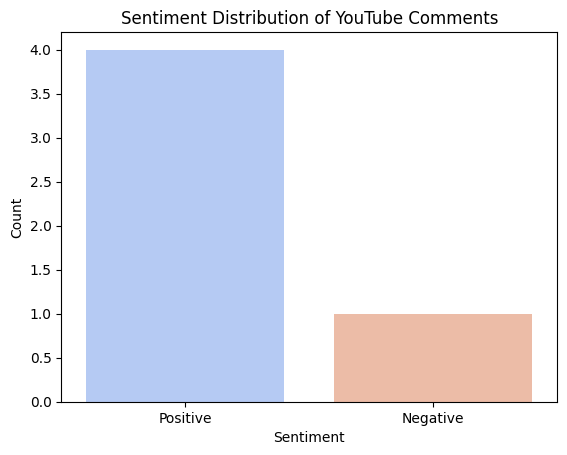

In [61]:
# Visualize the sentiment distribution
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [2]:
# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('/content/youtube_comments_with_sentiment.csv', index=False)

# Provide a download link for the new CSV file
from google.colab import files
files.download('/content/youtube_comments_with_sentiment.csv')

NameError: name 'df' is not defined

In [4]:
from google.colab import files

# Upload the CSV file
# uploaded = files.upload()

# Read the dataset
import pandas as pd
df = pd.read_csv('youtube_comments.csv')

# Display the dataset
df.head()

Saving youtube_comments.csv to youtube_comments (2).csv


,comment_id,comment_text
0,1,This video is so informative. Loved it!
1,2,Worst video ever. Waste of time.
2,3,Great explanation. Keep up the good work!
3,4,Not what I expected. Disappointed.
4,5,Amazing content! Really helpful.


In [7]:
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords (only needed once)
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply preprocessing
df['cleaned_text'] = df['comment_text'].apply(preprocess_text)

# Display the cleaned data
df[['comment_text', 'cleaned_text']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment_text,cleaned_text
0,This video is so informative. Loved it!,video informative loved
1,Worst video ever. Waste of time.,worst video ever waste time
2,Great explanation. Keep up the good work!,great explanation keep good work
3,Not what I expected. Disappointed.,expected disappointed
4,Amazing content! Really helpful.,amazing content really helpful
5,"Meh, it was okay. Could have been better.",meh okay could better
6,Very engaging and easy to understand.,engaging easy understand
7,"Too much irrelevant information, didn’t enjoy it.",much irrelevant information enjoy
8,Superb editing and great visuals!,superb editing great visuals
9,This is complete nonsense. Don’t recommend it ...,complete nonsense recommend


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (only needed once)
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0:
        return 'Positive'
    elif score['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Display the dataset with sentiments
df[['comment_text', 'cleaned_text', 'Sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,comment_text,cleaned_text,Sentiment
0,This video is so informative. Loved it!,video informative loved,Positive
1,Worst video ever. Waste of time.,worst video ever waste time,Negative
2,Great explanation. Keep up the good work!,great explanation keep good work,Positive
3,Not what I expected. Disappointed.,expected disappointed,Negative
4,Amazing content! Really helpful.,amazing content really helpful,Positive
5,"Meh, it was okay. Could have been better.",meh okay could better,Positive
6,Very engaging and easy to understand.,engaging easy understand,Positive
7,"Too much irrelevant information, didn’t enjoy it.",much irrelevant information enjoy,Positive
8,Superb editing and great visuals!,superb editing great visuals,Positive
9,This is complete nonsense. Don’t recommend it ...,complete nonsense recommend,Negative


<ipython-input-12-dd4e46a01ef5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


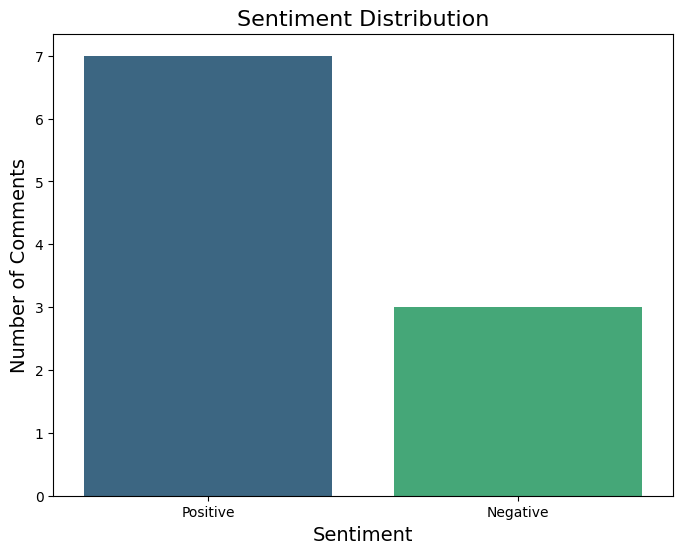

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of comments for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.show()

In [19]:
# Filter comments by sentiment (make sure the input is case-insensitive)
selected_sentiment = input("Enter a sentiment to filter (Positive, Negative, Neutral): ").capitalize()

# Check if the sentiment entered is valid
if selected_sentiment not in ['Positive', 'Negative', 'Neutral']:
    print("Invalid sentiment! Please enter one of: Positive, Negative, Neutral.")
else:
    # Filter the dataset based on the selected sentiment
    filtered_comments = df[df['Sentiment'] == selected_sentiment]

    # Display the filtered comments
    print(f"\nFiltered comments ({selected_sentiment}):")
    print(filtered_comments[['comment_id', 'comment_text', 'Sentiment']])

Enter a sentiment to filter (Positive, Negative, Neutral): positive

Filtered comments (Positive):
   comment_id                                       comment_text Sentiment
0           1            This video is so informative. Loved it!  Positive
2           3          Great explanation. Keep up the good work!  Positive
4           5                   Amazing content! Really helpful.  Positive
5           6          Meh, it was okay. Could have been better.  Positive
6           7              Very engaging and easy to understand.  Positive
7           8  Too much irrelevant information, didn’t enjoy it.  Positive
8           9                  Superb editing and great visuals!  Positive


In [20]:
# Save the full dataset with sentiment
df.to_csv('sentiment_analysis_results.csv', index=False)

# Save the filtered comments
filtered_comments.to_csv(f'filtered_comments_{selected_sentiment}.csv', index=False)

print("Files saved successfully!")

Files saved successfully!


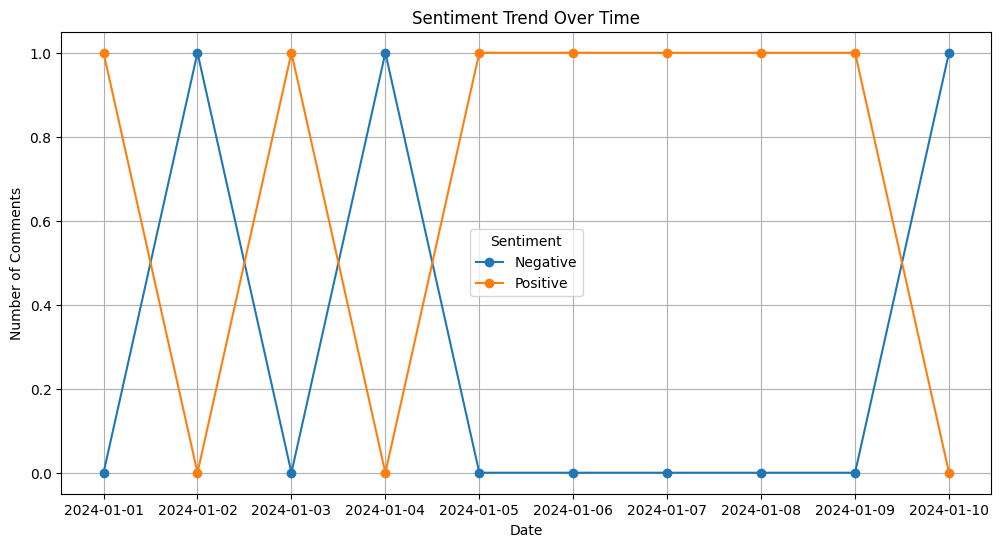

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulate adding a date column (if you don't already have one)
df['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(range(len(df)), 'D')

# Group by date and sentiment
sentiment_trend = df.groupby([df['date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Plot sentiment trend over time
sentiment_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()